In [18]:
import random
%matplotlib inline
import matplotlib.pyplot as plt
import torch

根据带有噪声的线性模型构造一个人造数据集.使用线性模型参数
$ w= [2,-3.4]^T$     $b = 4.2$和噪声像$\epsilon$生成数据集及其标签
$ y = Xw +b + \epsilon$

In [19]:
def synthetic_data(w, b, num_examples):
    """
    合成数据,人工制作数据
    :param w: 超参数 手动定义的线性模型参数
    :param b: 偏置
    :param num_examples:生成的样本数量
    :return:
    """
    X = torch.normal(0, 1, (num_examples, len(w)))  # X是一个均值为0,方差为1的随机数,shape =  (num_examples, len(w)
    y = torch.matmul(X, w) + b
    epsilon = torch.normal(0, 0.01, y.shape)  # 随机取得一个一个噪声
    y += epsilon
    return X, y.reshape((-1, 1)) # reshape 的-1表示为自动计算,1表示固定值

```python
torch.normal(means, std, shape)
```
means (Tensor) – 均值,包含每个输出元素相关的正态分布的均值。
std (Tensor) – 标准差,包含每个输出元素相关的正态分布的标准差。

返回一个张量，包含从给定参数means,std的离散正态分布中抽取随机数。
均值和标准差的形状不须匹配，但每个张量的元素个数须相同。


### 生成数据集

In [20]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
# features.shape = 1000,2

### 画图展示

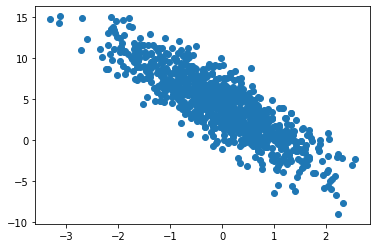

In [21]:
plt.scatter(features[:,1],labels)

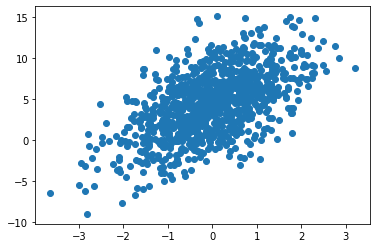

In [22]:
plt.scatter(features[:,0],labels)

定义一个data_iter函数,用于随机筛选
该函数接受批量大小,特征矩阵和标签向量作为输入,生成大小为batch_size的小批量

In [23]:
def data_iter(batch_size, features, labels):
    """
    从多个样本中,随机筛选出一部分组成一个batch
    :param batch_size: 一个batch中包含样本的个数
    :param features:
    :param labels:
    :return:
    """
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    indices = indices[:batch_size]  # 打乱顺序
    return features[indices], labels[indices]

# batch_size = 10
# new_features, new_labels = data_iter(batch_size, features, labels)
# print(new_features,"\n",new_labels)

### 初始化模型参数

In [24]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)# 偏差是一个标量

### 定义模型

In [25]:
def linreg(X, w, b):
    """
    线性模型
    :param X:
    :param w:
    :param b:
    :return:
    """
    return torch.matmul(X, w) + b

### 定义Loss函数

In [26]:
def squared_loss(y_hat, y):
    """
    计算损失值
    """
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 定义优化算法

In [27]:
def sgd(params, lr, batch_size):
    """
    Small Gradient Descent
    小批量随机梯度下降
    :param params: 给定的参数 w 和b
    :param lr: 学习率  learnRate
    :param batch_size:
    :return:
    """
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size  # 除以batch_size是因为我们是对整个进行求和,需要进行归一化处理
            param.grad.zero_()

### 训练过程

In [28]:
lr = .03
num_epochs = 3
net = linreg # 定义使用什么网络
loss = squared_loss #定义使用什么损失函数
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size= 10,features,labels)